In [ ]:
import zipfile
import os

# נתיב לקובץ ה-ZIP שהועלה
zip_path = "/content/policestationboundaries.gdb.zip"

# חלץ את התוכן לתוך קולאב
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/PoliceStationBoundaries")

# ודא שהתיקייה קיימת
gdb_path = "/content/PoliceStationBoundaries/PoliceStationBoundaries.gdb"
print("GeoDatabase path exists:", os.path.exists(gdb_path))


GeoDatabase path exists: True


In [ ]:
!pip install fiona

In [ ]:
import fiona

# רשימת שכבות
gdb_path = "/content/PoliceStationBoundaries/PoliceStationBoundaries.gdb"
layers = fiona.listlayers(gdb_path)
print("Available layers:", layers)

# טען שכבה לדוגמה
import geopandas as gpd
layer_name = layers[0]  # שכבה ראשונה
gdf = gpd.read_file(gdb_path, layer=layer_name)

print(gdf.head())


Available layers: ['PoliceMahozBoundaries', 'PoliceMerhavBoundaries', 'PoliceStationBoundaries']
  MahozName   SHAPE_Length    SHAPE_Area  \
0      דרום  750722.926821  1.453584e+10   
1       חוף  374342.153371  1.254465e+09   
2   ירושלים  241526.065492  6.819003e+08   
3      מרכז  286816.457612  1.259039e+09   
4      צפון  461646.983931  4.257680e+09   

                                            geometry  
0  MULTIPOLYGON (((170684.18 641711.35, 170760.07...  
1  MULTIPOLYGON (((228445.15 778605.01, 228464.34...  
2  MULTIPOLYGON (((216169.05 623628.83, 216118.25...  
3  MULTIPOLYGON (((188790.45 702021.73, 188890.1 ...  
4  MULTIPOLYGON (((273645.94 803870.81, 275379.97...  


    MerhavName MahozName   SHAPE_Length    SHAPE_Area  \
0  מרחב איילון   תל אביב   38864.683903  5.276257e+07   
1    מרחב אילת      דרום  280405.324417  2.702414e+09   
2     מרחב אשר       חוף  208311.404629  5.074636e+08   
3    מרחב גליל      צפון  145792.205732  4.325043e+08   
4     מרחב דוד   ירושלים    4975.103767  1.097502e+06   

                                            geometry  
0  MULTIPOLYGON (((181127.17 665160.55, 181142.64...  
1  MULTIPOLYGON (((170494.88 477632.37, 170502.85...  
2  MULTIPOLYGON (((228445.15 778605.01, 228464.34...  
3  MULTIPOLYGON (((234937.86 765555.03, 234948.66...  
4  MULTIPOLYGON (((222538.55 632343.1, 222545.84 ...  


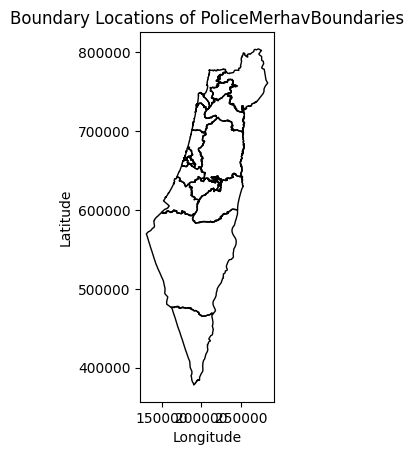

In [ ]:
import geopandas as gpd

# נתיב לקובץ ה-GDB
gdb_path = "/content/PoliceStationBoundaries/PoliceStationBoundaries.gdb"

# שם השכבה שאתה רוצה לטעון
layer_name = "PoliceMerhavBoundaries"  # שם השכבה של המרחבים

# טוען את השכבה
gdf = gpd.read_file(gdb_path, layer=layer_name)

# הצגת 5 השורות הראשונות כדי לראות את הנתונים
print(gdf.head())

# הצגת המפה עם הגבולות הגיאוגרפיים של המרחבים
gdf.plot(edgecolor='black', facecolor='none')
plt.title(f"Boundary Locations of {layer_name}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# נתיב לקובץ ה-GDB
gdb_path = "/content/PoliceStationBoundaries/PoliceStationBoundaries.gdb"

# שם השכבה שאתה רוצה לטעון
layer_name = "PoliceMerhavBoundaries"  # שם השכבה של המרחבים

# טוען את השכבה
gdf = gpd.read_file(gdb_path, layer=layer_name)

# הצגת 5 השורות הראשונות כדי לבדוק את שמות העמודות
print("עמודות בטבלה:")
print(gdf.columns)

# בדיקה מהם הערכים הייחודיים וכמותם בעמודה מסוימת
# שים לב שצריך להחליף את 'ColumnName' בשם העמודה שמייצגת את המרחבים
column_name = "MerhavName"  # החלף לשם העמודה
unique_values_map = gdf[column_name].value_counts()

# חישוב הערכים הייחודיים וסכומם
unique_values_map = gdf[column_name].unique()
unique_sum = len(unique_values_map)

# הדפסה
print("\nהערכים הייחודיים בעמודה:")
print(unique_values_map)
print(f"\nמספר הערכים הייחודיים: {unique_sum}")

עמודות בטבלה:
Index(['MerhavName', 'MahozName', 'SHAPE_Length', 'SHAPE_Area', 'geometry'], dtype='object')

הערכים הייחודיים בעמודה:
['מרחב איילון' 'מרחב אילת' 'מרחב אשר' 'מרחב גליל' 'מרחב דוד' 'מרחב דן'
 'מרחב יהודה' 'מרחב ירקון' 'מרחב כנרת' 'מרחב כרמל' 'מרחב לכיש' 'מרחב מנשה'
 'מרחב נגב' 'מרחב נתב"ג' 'מרחב עמקים' 'מרחב ציון' 'מרחב קדם' 'מרחב שומרון'
 'מרחב שפלה\r\n' 'מרחב שרון']

מספר הערכים הייחודיים: 20


# **ייבוא הדאטה**

In [ ]:
import requests
import pandas as pd


In [ ]:
url_2020 = 'https://data.gov.il/api/3/action/datastore_search?resource_id=520597e3-6003-4247-9634-0ae85434b971'
response_2020 = requests.get(url_2020)
data_2020 = response_2020.json()
records_2020 = data_2020['result']['records']
df_2020 = pd.DataFrame(records_2020)

In [ ]:
url_2021 = 'https://data.gov.il/api/3/action/datastore_search?resource_id=3f71fd16-25b8-4cfe-8661-e6199db3eb12'
response_2021 = requests.get(url_2021)
data_2021 = response_2021.json()
records_2021 = data_2021['result']['records']
df_2021 = pd.DataFrame(records_2021)

In [ ]:
url_2022 = 'https://data.gov.il/api/3/action/datastore_search?resource_id=a59f3e9e-a7fe-4375-97d0-76cea68382c1'
response_2022 = requests.get(url_2022)
data_2022 = response_2022.json()
records_2022 = data_2022['result']['records']
df_2022 = pd.DataFrame(records_2022)

In [ ]:
url_2023 = 'https://data.gov.il/api/3/action/datastore_search?resource_id=32aacfc9-3524-4fba-a282-3af052380244'
response_2023 = requests.get(url_2023)
data_2023 = response_2023.json()
records_2023 = data_2023['result']['records']
df_2023 = pd.DataFrame(records_2023)

In [ ]:
url_2024 = 'https://data.gov.il/api/3/action/datastore_search?resource_id=5fc13c50-b6f3-4712-b831-a75e0f91a17e'
response_2024 = requests.get(url_2024)
data_2024 = response_2024.json()
records_2024 = data_2024['result']['records']
df_2024 = pd.DataFrame(records_2024)

In [ ]:
df_all = pd.concat([df_2020, df_2021, df_2022, df_2023, df_2024], ignore_index=True)

df_all

,_id,FictiveIDNumber,Year,Quarter,YeshuvKod,Yeshuv,PoliceDistrictKod,PoliceDistrict,PoliceMerhavKod,PoliceMerhav,PoliceStationKod,PoliceStation,municipalKod,municipalName,StatisticAreaKod,StatisticArea,StatisticGroupKod,StatisticGroup,StatisticTypeKod,StatisticType
0,1,D681A6DC3CF151AA4846DF0893A1BDE7,2020,Q2,5000.0,תל אביב יפו,20000000.0,מחוז תא,21800000.0,מרחב איילון החדש תא,21801000.0,תחנת תל אביב דרום איילון החדש,NaN,None,50000934.0,התקווה (מרכז),700,עבירות כלפי הרכוש,719,גרימת נזק לרכוש בזדון
1,2,CC7274FAB8CECA43AFBB5598A031C7D8,2020,Q2,7900.0,פתח תקווה,40000000.0,מחוז מרכז,41100000.0,מרחב שרון,41111000.0,תחנת פתח תקוה שרון,NaN,None,79000433.0,קרית חזני (מערב),600,עבירות כלפי המוסר,609,סחריבוא ויצוא סמים
2,3,DD63A80B87771A39D856D709781E8DEE,2020,Q1,6600.0,חולון,20000000.0,מחוז תא,21800000.0,מרחב איילון החדש תא,15005645.0,תחנת חולון איילון החדש,NaN,None,66000413.0,נאות שושנים (דרום),700,עבירות כלפי הרכוש,715,גניבות אחרות
3,4,9F3E82C433BDF624F57407B1E190F95A,2020,Q3,5000.0,תל אביב יפו,20000000.0,מחוז תא,21700000.0,מרחב ירקון תא,21701000.0,תחנת לב תא ירקון,NaN,None,50000515.0,מרכז תא (5),400,עבירות נגד גוף,404,(תקיפה (למעט עובדי ציבור
4,5,6406AAB8948F9D1641422A252DA3BD8D,2020,Q1,NaN,None,70000000.0,מחוז שי,71500000.0,מרחב שומרון שי,71600000.0,תחנת בנימין שומרון,NaN,ישוב פלסטיני,NaN,None,200,עבירות סדר ציבורי,220,עבירות על חוק הכניסה לישראל
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,31996,90436EB14258AF1D12D77E823DC6B4C5,2024,Q2,5000.0,תל אביב יפו,20000000.0,מחוז תא,21700000.0,מרחב ירקון תא,21703000.0,תחנת תא צפון ירקון,NaN,None,50000114.0,תוכנית ל' (מרכז),800,עבירות מרמה,803,מרמה ועושק
159996,31997,AEF086FF79FFD7AFD3C2D51E23A1F59C,2024,Q4,4000.0,חיפה,80000000.0,מחוז חוף,15005216.0,מרחב כרמל חוף,81100000.0,תחנת חיפה מחוז חוף,NaN,None,40000811.0,זיו,700,עבירות כלפי הרכוש,719,גרימת נזק לרכוש בזדון
159997,31998,4D1F4DB7F1F6F3A15C22A5E4E862386B,2024,Q2,NaN,None,70000000.0,מחוז שי,71400000.0,מרחב יהודה שי,71400800.0,תחנת עציון יהודה,NaN,ישוב פלסטיני,NaN,None,200,עבירות סדר ציבורי,200,עבירות סדר ציבורי
159998,31999,0E4FD63F4C4B2D9C3174AD687506E982,2024,Q1,7100.0,אשקלון,30000000.0,מחוז דרומי,31200000.0,מרחב לכיש,31210000.0,תחנת אשקלון לכיש,NaN,None,71000313.0,שיקמים (שמשון מזרח),800,עבירות מרמה,803,מרמה ועושק


In [ ]:
# ערכים ייחודיים בעמודת PoliceMerhav
unique_values_df = df_all['PoliceMerhav'].unique()

# הדפסת הערכים הייחודיים
print("ערכים ייחודיים בעמודת 'PoliceMerhav':")
print(unique_values_df)

# הדפסת כמות הערכים הייחודיים
print(f"\nמספר הערכים הייחודיים בעמודת 'PoliceMerhav': {len(unique_values_df)}")

ערכים ייחודיים בעמודת 'PoliceMerhav':
['מרחב איילון החדש תא' 'מרחב שרון' 'מרחב ירקון תא' 'מרחב שומרון שי'
 'מרחב נגב' 'מרחב ציון ירושלים' 'מרחב קדם ירושלים' 'מרחב כנרת צפון'
 'מרחב מנשה חוף' 'מרחב כרמל חוף' 'מרחב אילת דרום' 'מרחב עמקים צפון'
 'מרחב אשר חוף' 'מרחב גליל צפון' 'מרחב שפלה' 'מרחב לכיש' 'מרחב דן תא'
 'מרחב יהודה שי' 'מרחב דוד ירושלים' 'מרחב נתבג מרכז' None '' 'כל הארץ'
 'מרחב איילון הישן תא']

מספר הערכים הייחודיים בעמודת 'PoliceMerhav': 24


In [ ]:
# המרה של הרשימות לסטים (קבוצות) כדי לבצע השוואות
set_unique_map = set(unique_values_map)
set_unique_df = set(unique_values_df)

# דמיון: ערכים המשותפים לשני הסטים
common_values = set_unique_map.intersection(set_unique_df)

# מה שיש ב-df ואין ב-map
values_in_df_not_in_map = set_unique_df.difference(set_unique_map)

# מה שיש ב-map ואין ב-df
values_in_map_not_in_df = set_unique_map.difference(set_unique_df)

# הדפסות
print("ערכים זהים בין map ו-df:")
print(common_values)

print("\nערכים שנמצאים ב-df אך לא ב-map:")
print(values_in_df_not_in_map)

print("\nערכים שנמצאים ב-map אך לא ב-df:")
print(values_in_map_not_in_df)


ערכים זהים בין map ו-df:
{'מרחב שרון', 'מרחב לכיש', 'מרחב נגב'}

ערכים שנמצאים ב-df אך לא ב-map:
{'', 'מרחב כנרת צפון', None, 'מרחב שפלה', 'מרחב דן תא', 'מרחב איילון הישן תא', 'כל הארץ', 'מרחב איילון החדש תא', 'מרחב ירקון תא', 'מרחב כרמל חוף', 'מרחב אילת דרום', 'מרחב גליל צפון', 'מרחב שומרון שי', 'מרחב נתבג מרכז', 'מרחב יהודה שי', 'מרחב מנשה חוף', 'מרחב עמקים צפון', 'מרחב ציון ירושלים', 'מרחב דוד ירושלים', 'מרחב אשר חוף', 'מרחב קדם ירושלים'}

ערכים שנמצאים ב-map אך לא ב-df:
{'מרחב אשר', 'מרחב יהודה', 'מרחב אילת', 'מרחב נתב"ג', 'מרחב דן', 'מרחב כנרת', 'מרחב כרמל', 'מרחב שומרון', 'מרחב ירקון', 'מרחב קדם', 'מרחב מנשה', 'מרחב דוד', 'מרחב גליל', 'מרחב עמקים', 'מרחב שפלה\r\n', 'מרחב ציון', 'מרחב איילון'}


In [ ]:
# בדיקה אם 'מרחב שפלה' נמצא בעמודת המרחב ב-GeoDataFrame (gdf)
if 'מרחב שפלה\r\n' in gdf['MerhavName'].values:
    print("מרחב שפלה נמצא בעמודת המרחב של ה-GeoDataFrame")
else:
    print("מרחב שפלה לא נמצא בעמודת המרחב של ה-GeoDataFrame")

# בדיקה אם 'מרחב שפלה' נמצא בעמודת המרחב ב-DataFrame (all_df)
if 'מרחב שפלה' in df_all['PoliceMerhav'].values:
    print("מרחב שפלה נמצא בעמודת המרחב של ה-DataFrame")
else:
    print("מרחב שפלה לא נמצא בעמודת המרחב של ה-DataFrame")


מרחב שפלה נמצא בעמודת המרחב של ה-GeoDataFrame
מרחב שפלה נמצא בעמודת המרחב של ה-DataFrame


## **תיאום שמות מרחבים**

In [ ]:
import pandas as pd
import geopandas as gpd

merhav_mapping = {

    "מרחב איילון החדש תא": "מרחב איילון",
    "מרחב איילון הישן תא": "מרחב איילון",
    "מרחב לכיש": "מרחב לכיש",
    "מרחב נגב": "מרחב נגב",
    "מרחב שרון": "מרחב שרון",
    "מרחב אילת דרום": "מרחב אילת",
    "מרחב אשר חוף": "מרחב אשר",
    "מרחב יהודה שי": "מרחב יהודה",
    "מרחב גליל צפון": "מרחב גליל",
    "מרחב ירקון תא":"מרחב ירקון",
    "מרחב דוד ירושלים": "מרחב דוד",
    "מרחב שומרון שי": "מרחב שומרון",
    "מרחב כרמל חוף": "מרחב כרמל",
    'מרחב שפלה': 'מרחב שפלה\r\n',  # תיקון תו מיוחד
    "מרחב דן תא": "מרחב דן",
    "מרחב קדם ירושלים": "מרחב קדם",
    "מרחב ציון ירושלים": "מרחב ציון",
    "מרחב כנרת צפון": "מרחב כנרת",
    "מרחב עמקים צפון": "מרחב עמקים",
    'מרחב נתבג מרכז': 'מרחב נתב"ג',
    "מרחב מנשה חוף": "מרחב מנשה",
}


# שלב 1: הסרת ערכים ריקים ו-None לפני המיפוי
df_all = df_all.dropna(subset=['PoliceMerhav'])  # הסרת ערכים ריקים
df_all = df_all[df_all['PoliceMerhav'] != '']  # הסרת ערכים ריקים (מחרוזות ריקות)

# שלב 2: מיפוי השמות הישנים לשמות החדשים
df_all['PoliceMerhav'] = df_all['PoliceMerhav'].replace(merhav_mapping)

# שלב 3: הסרת כל ערך שאינו תואם למפות (אם יש שמות שלא נמצאים במיפוי)
df_all = df_all[df_all['PoliceMerhav'].isin(merhav_mapping.values())]

# שלב 4: ווידוא שהשמות תואמים
unique_values_df = df_all['PoliceMerhav'].unique()
unique_values_map = gdf['MerhavName'].unique()

# חיתוך של הערכים
set_unique_df = set(unique_values_df)
set_unique_map = set(unique_values_map)

# ערכים משותפים
common_values = set_unique_df.intersection(set_unique_map)
print("\nערכים זהים בין df ל-map:")
print(common_values)

# ערכים שיש ב-df ואין ב-map
values_in_df_not_in_map = set_unique_df.difference(set_unique_map)
print("\nערכים שנמצאים ב-df אך לא ב-map:")
print(values_in_df_not_in_map)

# ערכים שיש ב-map ואין ב-df
values_in_map_not_in_df = set_unique_map.difference(set_unique_df)
print("\nערכים שנמצאים ב-map אך לא ב-df:")
print(values_in_map_not_in_df)

# שלב 5: בדיקה אם הכל תואם
if not values_in_df_not_in_map and not values_in_map_not_in_df:
    print("\nהכל תקין! כל הערכים תואמים בין df ל-map.")
else:
    print("\nיש אי התאמות בין הערכים של df ל-map.")




ערכים זהים בין df ל-map:
{'מרחב אשר', 'מרחב יהודה', 'מרחב גליל', 'מרחב שפלה\r\n', 'מרחב ציון', 'מרחב איילון', 'מרחב נגב', 'מרחב כנרת', 'מרחב שומרון', 'מרחב ירקון', 'מרחב קדם', 'מרחב אילת', 'מרחב נתב"ג', 'מרחב שרון', 'מרחב מנשה', 'מרחב לכיש', 'מרחב דן', 'מרחב כרמל', 'מרחב דוד', 'מרחב עמקים'}

ערכים שנמצאים ב-df אך לא ב-map:
set()

ערכים שנמצאים ב-map אך לא ב-df:
set()

הכל תקין! כל הערכים תואמים בין df ל-map.


In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import geopandas as gpd
import dash_bootstrap_components as dbc
from dash.dependencies import Input, Output
import matplotlib.pyplot as plt
from io import BytesIO
import base64

# יצירת אפליקציית Dash
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# נתיב לקובץ ה-GDB
gdb_path = "/content/PoliceStationBoundaries/PoliceStationBoundaries.gdb"
layer_name = "PoliceMerhavBoundaries"

# טוען את השכבה
gdf = gpd.read_file(gdb_path, layer=layer_name)

# טוען את הדאטה פריים שלך (זה הדאטה שמכיל את כל העבירות והמידע)
# כאן אתה צריך להחליף את הנתיב של df_all עם הקובץ שלך שמכיל את העבירות
# df_all = pd.read_csv('data.csv')  # יש למלא את הנתיב המתאים

# התחלת האפליקציה עם ממשק לבחירת סוג העבירה ושנת העבירה
app.layout = html.Div([
    dbc.Row([
        dbc.Col(html.H1("מפת חום - עבירות משטרת ישראל"), width=12)
    ]),
    dbc.Row([
        dbc.Col(html.Label("בחר סוג עבירה:"), width=4),
        dbc.Col(dcc.Dropdown(
            id='crime-type-dropdown',
            options=[{'label': crime, 'value': crime} for crime in df_all['StatisticGroup'].unique()] + [{'label': 'כל סוגי העבירות', 'value': 'all_crimes'}],
            value='all_crimes',  # ברירת מחדל
            clearable=False
        ), width=4),
    ]),

    dbc.Row([
        dbc.Col(html.Label("בחר שנה:"), width=4),
        dbc.Col(dcc.Dropdown(
            id='year-dropdown',
            options=[
                {'label': 'לאורך כל השנים', 'value': 'all_years'},
                {'label': '2020', 'value': 2020},
                {'label': '2021', 'value': 2021},
                {'label': '2022', 'value': 2022},
                {'label': '2023', 'value': 2023},
                {'label': '2024', 'value': 2024}
            ],
            value='all_years',  # ברירת מחדל
            clearable=False
        ), width=4),
    ]),

    dbc.Row([
        dbc.Col(html.Img(id='heatmap', style={'width': '100%'}), width=12)
    ])
])

# פונקציה ליצירת המפה ב- Matplotlib ולהמיר לתמונה
@app.callback(
    Output('heatmap', 'src'),
    [Input('crime-type-dropdown', 'value'),
     Input('year-dropdown', 'value')]
)
def generate_static_map(selected_crime, selected_year):
    # אם נבחר "כל סוגי העבירות", נתייחס לכל העבירות
    if selected_crime == 'all_crimes':
        filtered_df = df_all
    else:
        filtered_df = df_all[df_all['StatisticGroup'] == selected_crime]

    # סינון לפי שנה
    if selected_year != 'all_years':
        filtered_df = filtered_df[filtered_df['Year'] == selected_year]

    # סיכום כמות הרשומות לכל מרחב
    merhav_counts = filtered_df['PoliceMerhav'].value_counts()

    # הוספת עמודת 'record_count' ל-gdf עם כמות הרשומות
    gdf['record_count'] = gdf['MerhavName'].map(merhav_counts).fillna(0)

    # יצירת המפה הסטטית ב-Matplotlib
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    gdf.plot(column='record_count', ax=ax, legend=True,
             legend_kwds={'label': "Number of Records by Police Merhav",
                          'orientation': "horizontal"},
             cmap='YlOrRd', edgecolor='black')
    ax.set_title(f"Heatmap of {selected_crime} for {selected_year}" if selected_year != 'all_years' else f"Heatmap of {selected_crime} (All Years)")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

    # המרת התמונה ל-base64
    buf = BytesIO()
    plt.savefig(buf, format="png")
    buf.seek(0)
    img_str = base64.b64encode(buf.read()).decode('utf-8')
    buf.close()

    # החזרת התמונה כ-URL לשימוש ב-Dash
    return f"data:image/png;base64,{img_str}"

if __name__ == '__main__':
    app.run_server(debug=True)




<IPython.core.display.Javascript object>

In [ ]:
!pip install dash

In [ ]:
pip install dash-bootstrap-components


    MerhavName MahozName   SHAPE_Length    SHAPE_Area  \
0  מרחב איילון   תל אביב   38864.683903  5.276257e+07   
1    מרחב אילת      דרום  280405.324417  2.702414e+09   
2     מרחב אשר       חוף  208311.404629  5.074636e+08   
3    מרחב גליל      צפון  145792.205732  4.325043e+08   
4     מרחב דוד   ירושלים    4975.103767  1.097502e+06   

                                            geometry  
0  MULTIPOLYGON (((181127.17 665160.55, 181142.64...  
1  MULTIPOLYGON (((170494.88 477632.37, 170502.85...  
2  MULTIPOLYGON (((228445.15 778605.01, 228464.34...  
3  MULTIPOLYGON (((234937.86 765555.03, 234948.66...  
4  MULTIPOLYGON (((222538.55 632343.1, 222545.84 ...  


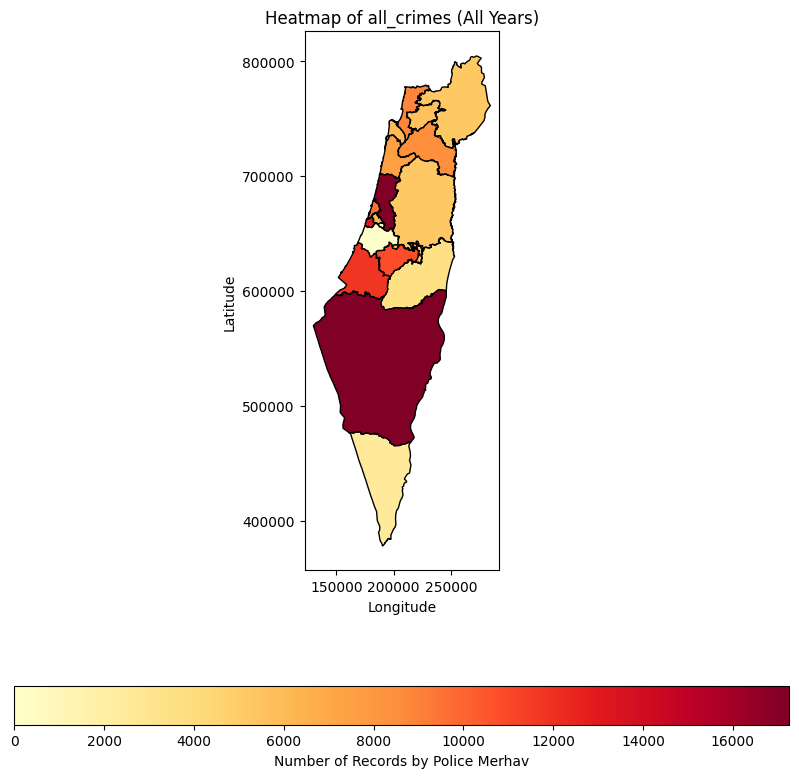

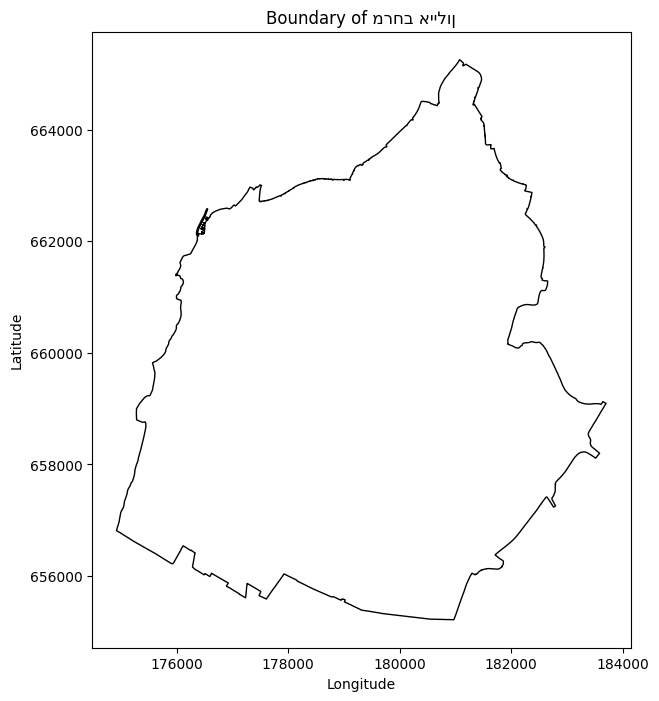

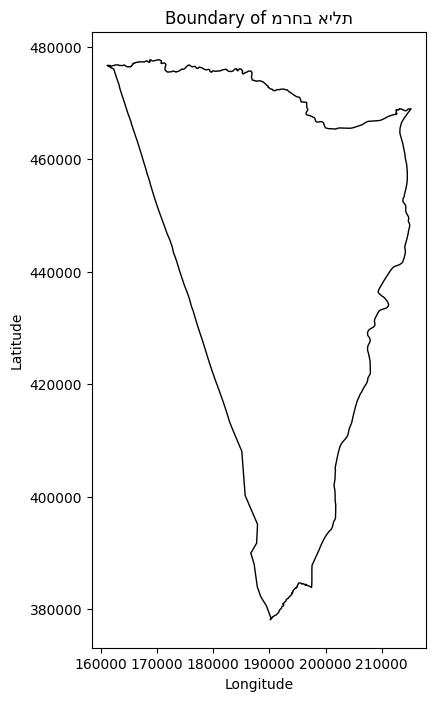

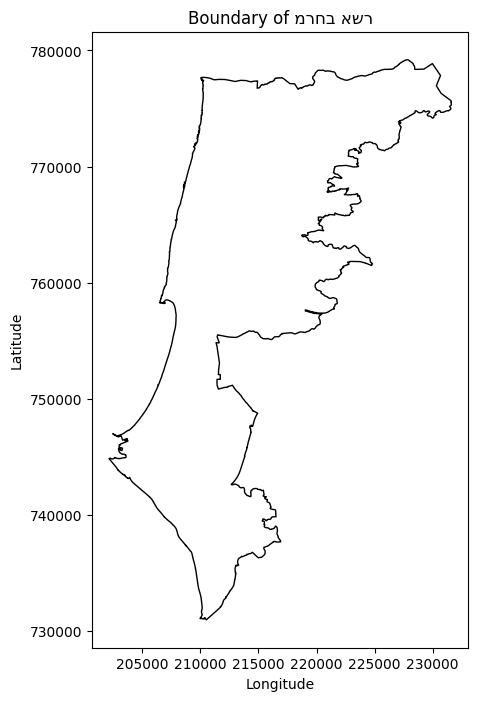

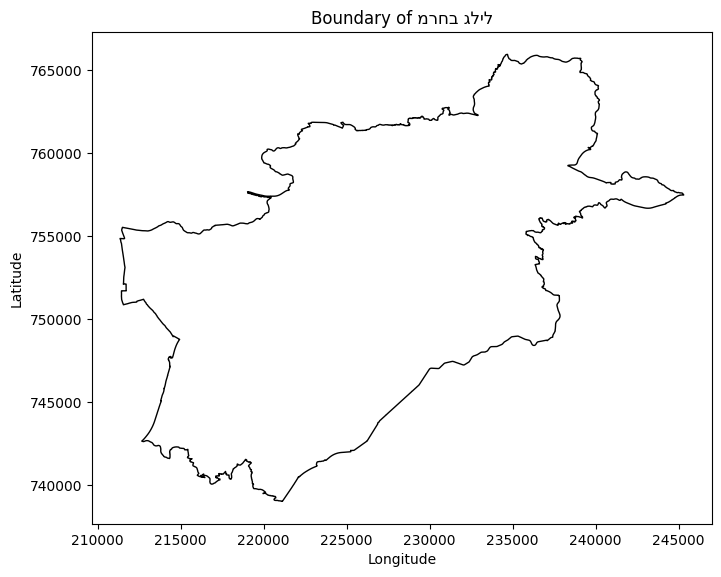

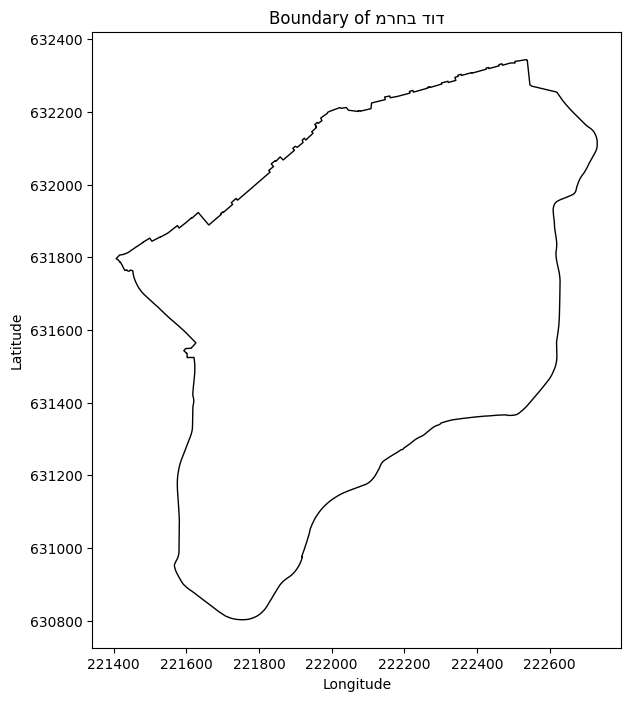

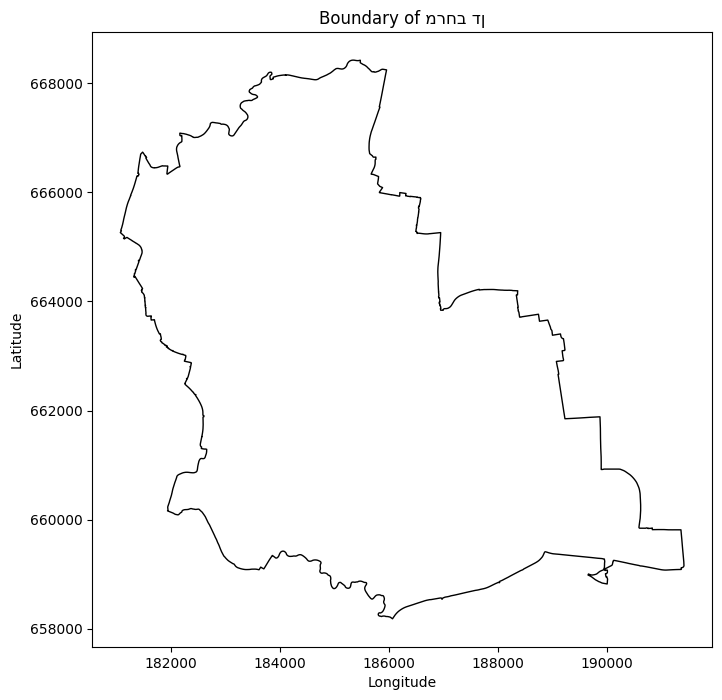

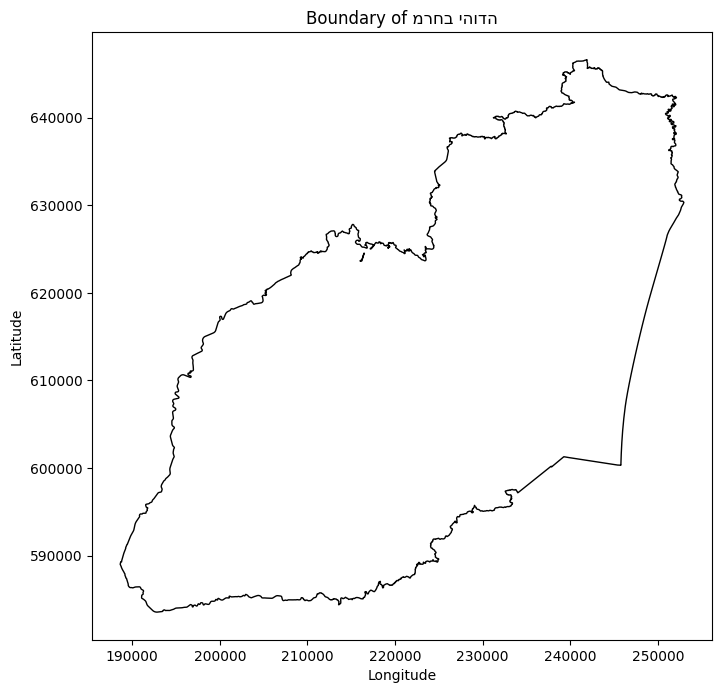

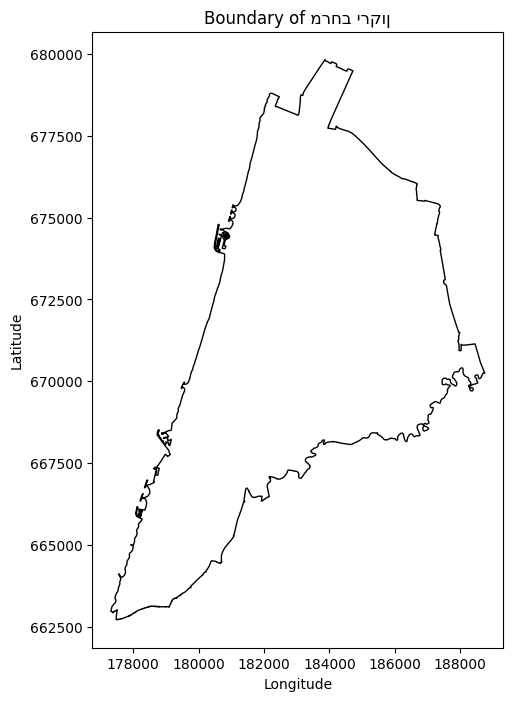

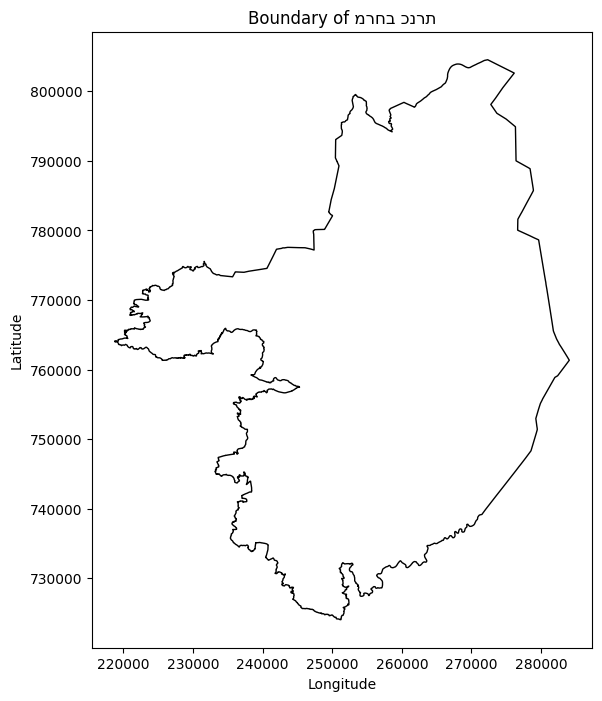

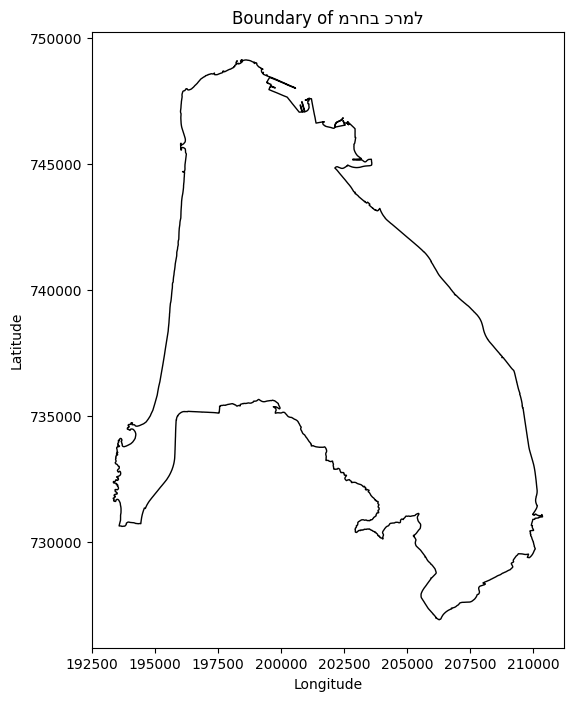

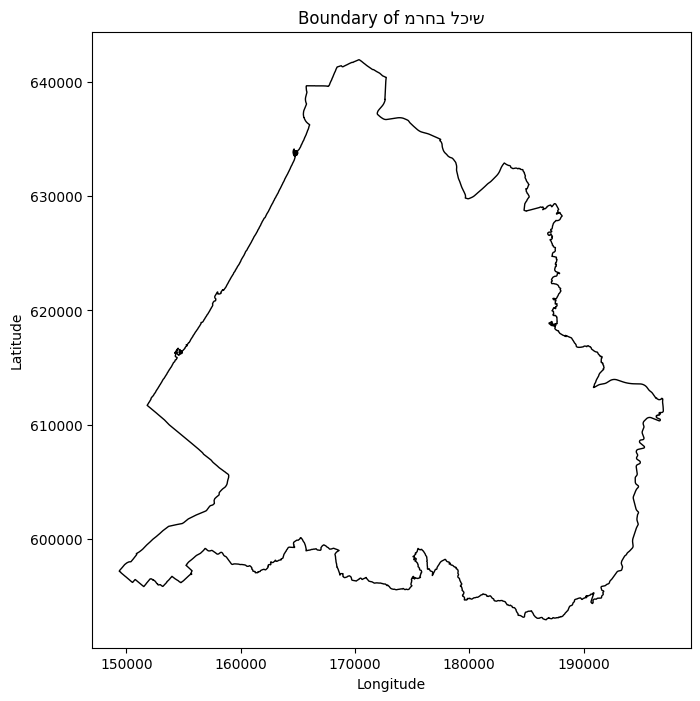

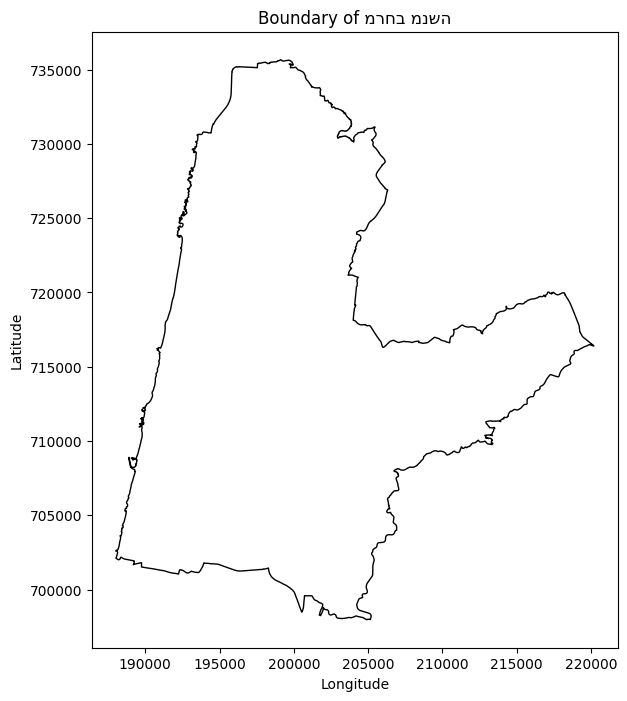

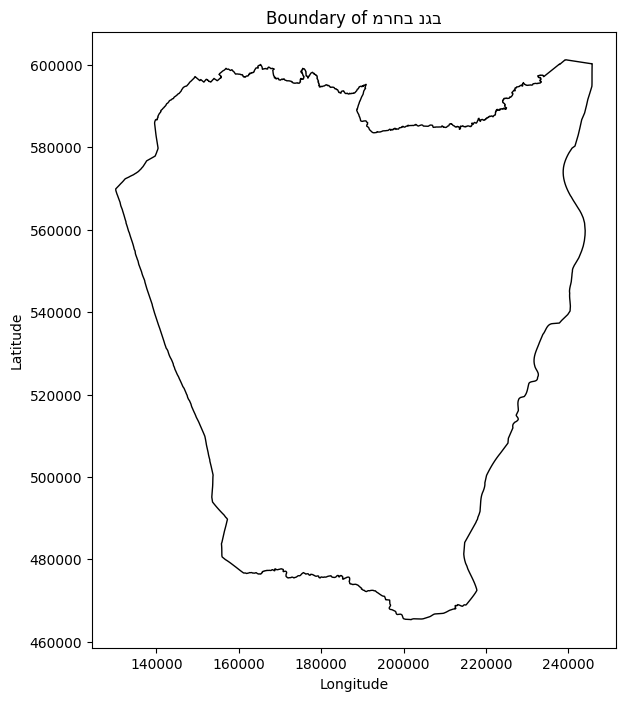

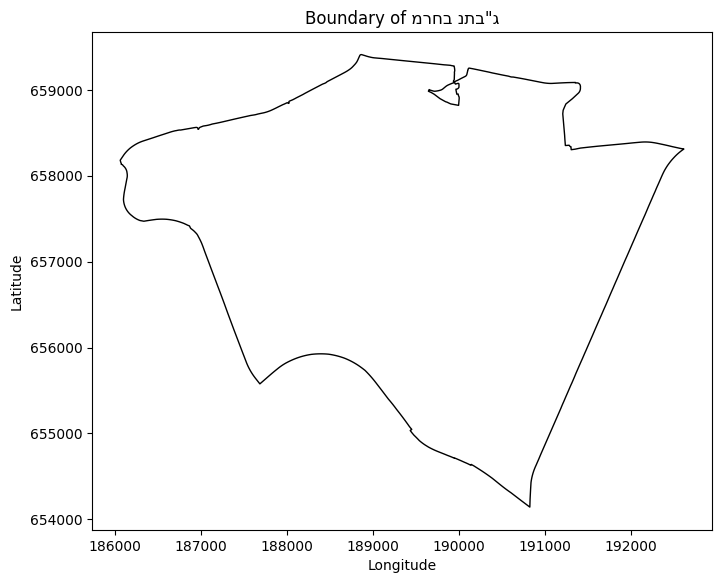

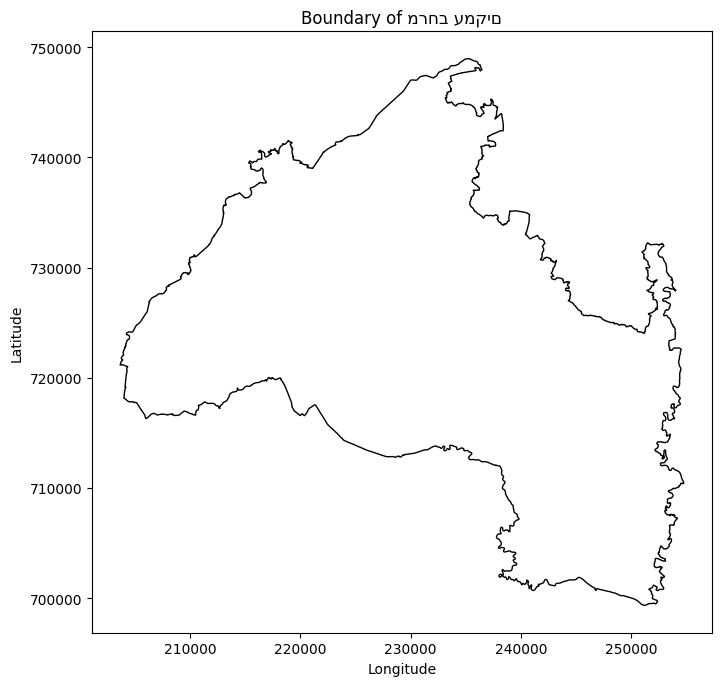

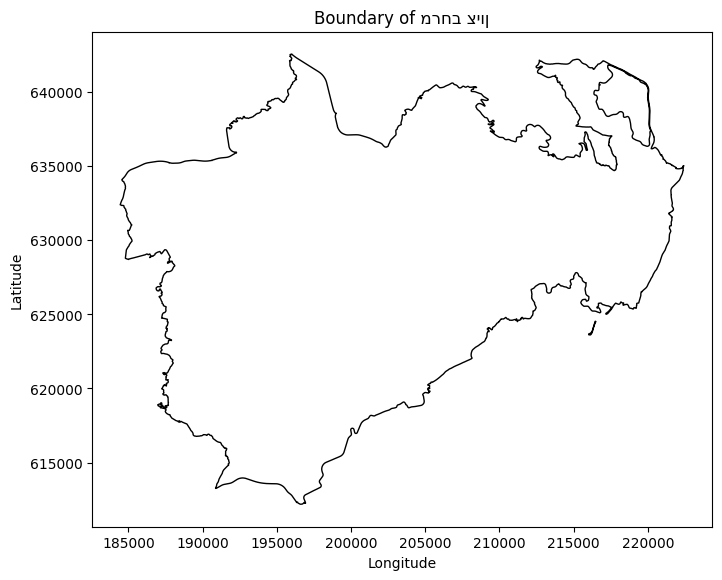

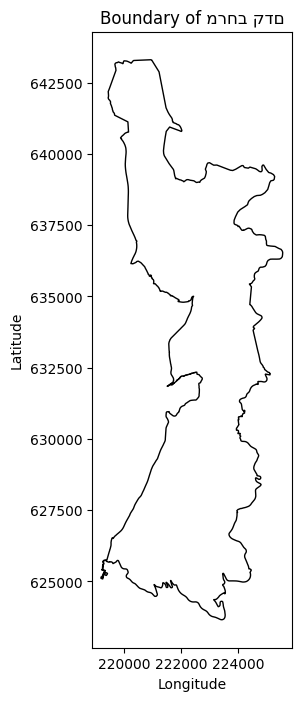

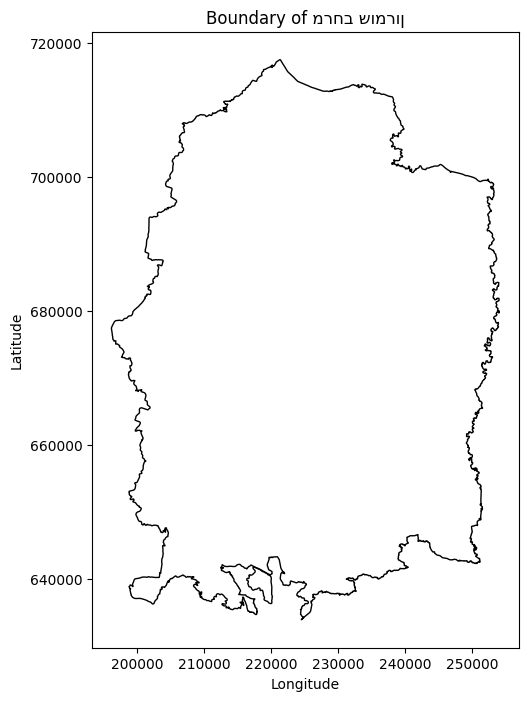

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

) missing from font(s) DejaVu Sans.



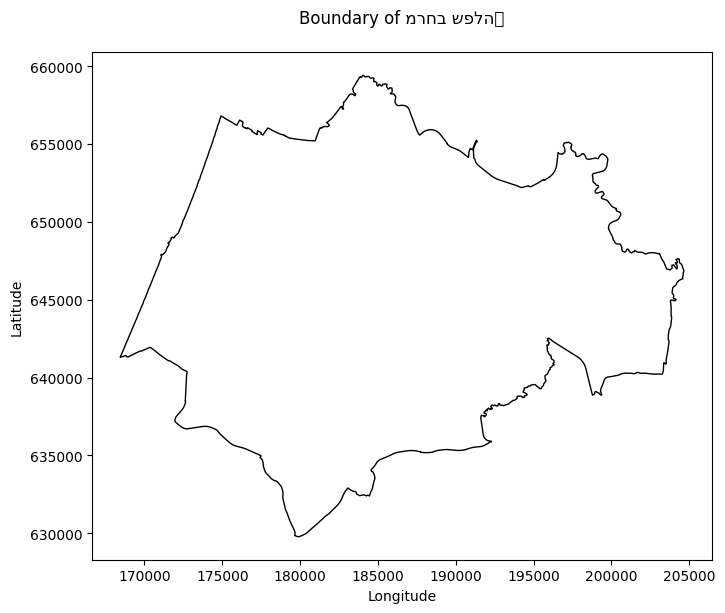

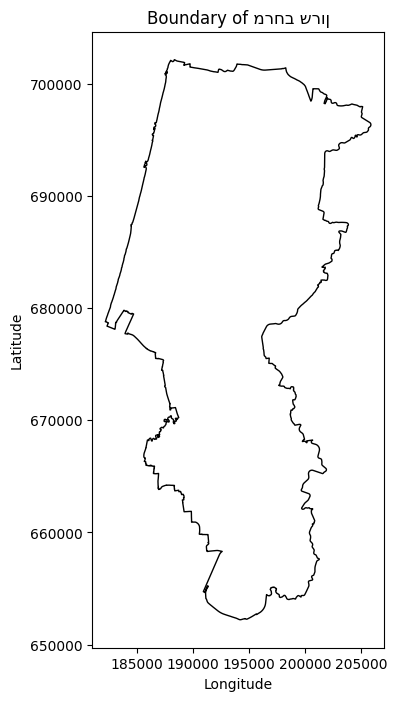

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# נתיב לקובץ ה-GDB
gdb_path = "/content/PoliceStationBoundaries/PoliceStationBoundaries.gdb"

# שם השכבה שאתה רוצה לטעון
layer_name = "PoliceMerhavBoundaries"  # שם השכבה של המרחבים

# טוען את השכבה
gdf = gpd.read_file(gdb_path, layer=layer_name)

# הצגת 5 השורות הראשונות כדי לראות את הנתונים
print(gdf.head())

# יצירת מפה לכל מרחב בנפרד
for idx, row in gdf.iterrows():
    # יצירת מפה חדשה לכל מרחב
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    # Plot של המרחב הנוכחי
    gdf.loc[[idx]].plot(ax=ax, edgecolor='black', facecolor='none')

    # כותרת עם שם המרחב
    ax.set_title(f"Boundary of {row['MerhavName']}")  # 'MerhavName' או שם העמודה המתאימה לשם המרחב
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

    # הצגת המפה
    plt.show()
